# DAB-SMOTE INITIAL BENCHMARKS #
## Authors: Unai Lalana Morales & José Antonio Sanz Delgado ##

### Imports ###

In [37]:
#Sistem imports
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..\..', 'classes')))

#Local imports
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
import DAB_SMOTE
from dataset import dataReading

### Functions ###

In [3]:
def highlight_max(row):
    values_to_compare = row[1:]
    maximum = max(values_to_compare)
    is_unique = (values_to_compare == maximum).sum() == 1
    styles = []
    for val in values_to_compare:
        if val == maximum:
            color = 'green' if is_unique else 'orange'
            styles.append(f'background-color: {color}; font-weight: bold;')
        else:
            styles.append('')
    return [''] + styles

In [4]:
from tqdm import tqdm

def benchmark(root_path, param_name, methods, fixed_params):
    dataframe_names = []
    results_per_method = {method: [] for method in methods}
    dirs = [d for d in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, d))]
    for paths in tqdm(dirs, desc="Processing datasets"):
        complete_path = os.path.join(root_path, paths)
        dataframe_names.append(paths)
        train = []
        test = []
        for file in os.listdir(complete_path):
            if "tra.dat" in file:
                train_data = dataReading(complete_path + "/" + file)
                train.append(train_data)
                suffix = file.replace("tra.dat", "")
                test_data = dataReading(complete_path + "/" + suffix + "tst.dat")
                test.append(test_data)
        
        for method in methods:
            f1_scores = []
            for i in range(len(train)):
                dab = DAB_SMOTE.DAB_SMOTE(**{param_name: method}, **fixed_params)
                newX, newY = dab.fit_resample(train[i].data, train[i].target)
                cls = linear_model.LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000)
                cls.fit(newX, newY)
                predictions = cls.predict(test[i].data)
                f1_scores.append(f1_score(np.array(test[i].target), predictions, pos_label=0))
            results_per_method[method].append(np.mean(f1_scores))

    df_methods = pd.DataFrame(results_per_method)
    df_methods = pd.concat([pd.DataFrame(dataframe_names, columns=["dataset"]),df_methods], axis=1)
    return dataframe_names, df_methods


### First benchmark ###
#### k=1 and means solver ####

In [24]:
methods = ["euclidean", "manhattan", "chebyshev"]
fiexed_params = {"k": 1}
dataframe_names, dbscan_distances_df_lower_mean = benchmark("./../../data/benchmarks/imb_IRLowerThan9/","distMethod", methods, fiexed_params)

Processing datasets: 100%|██████████| 22/22 [01:11<00:00,  3.26s/it]


In [25]:
means = dbscan_distances_df_lower_mean.iloc[:, 1:].mean(axis=0)
print("Max mean of F1 scores: ", means.max(), "Method: ", methods[means.argmax()])

means_row = pd.DataFrame([['MEANS'] + means.tolist()], columns=dbscan_distances_df_lower_mean.columns)
dbscan_distances_df_lower_mean_with_means = pd.concat([dbscan_distances_df_lower_mean, means_row], ignore_index=True)
dbscan_distances_df_lower_mean_with_means_color = dbscan_distances_df_lower_mean_with_means.style.apply(highlight_max, axis=1)
dbscan_distances_df_lower_mean_with_means_color

Max mean of F1 scores:  0.7796944052346436 Method:  euclidean


,dataset,euclidean,manhattan,chebyshev
0,ecoli-0_vs_1,0.976369,0.976369,0.975662
1,ecoli1,0.769922,0.769922,0.756427
2,ecoli2,0.708644,0.708644,0.714277
3,ecoli3,0.604589,0.611256,0.600384
4,glass-0-1-2-3_vs_4-5-6,0.832573,0.856210,0.844954
5,glass0,0.644528,0.644528,0.646500
6,glass1,0.576912,0.576912,0.576062
7,glass6,0.812821,0.779487,0.791608
8,haberman,0.466593,0.481590,0.480482
9,iris0,1.000000,1.000000,1.000000


In [26]:
methods = ["euclidean", "manhattan", "chebyshev"]
fiexed_params = {"k": 1}
dataframe_names, dbscan_distances_df_higher_mean = benchmark("./../../data/benchmarks/imb_IRHigherThan9p1/","distMethod", methods, fiexed_params)

Processing datasets: 100%|██████████| 21/21 [00:45<00:00,  2.16s/it]


In [27]:
means = dbscan_distances_df_higher_mean.iloc[:, 1:].mean(axis=0)
print("Max mean of F1 scores: ", means.max(), "Method: ", methods[means.argmax()])

means_row = pd.DataFrame([['MEANS'] + means.tolist()], columns=dbscan_distances_df_higher_mean.columns)
dbscan_distances_df_higher_mean_with_means = pd.concat([dbscan_distances_df_higher_mean, means_row], ignore_index=True)
dbscan_distances_df_higher_mean_with_means_color = dbscan_distances_df_higher_mean_with_means.style.apply(highlight_max, axis=1)
dbscan_distances_df_higher_mean_with_means_color

Max mean of F1 scores:  0.453105126903771 Method:  euclidean


,dataset,euclidean,manhattan,chebyshev
0,abalone19,0.056061,0.056221,0.054509
1,abalone9-18,0.428553,0.414661,0.412172
2,ecoli-0-1-3-7_vs_2-6,0.413333,0.413333,0.413333
3,ecoli4,0.791111,0.791111,0.776566
4,glass-0-1-6_vs_2,0.150392,0.098413,0.098413
5,glass-0-1-6_vs_5,0.411429,0.411429,0.411429
6,glass2,0.183725,0.163993,0.163993
7,glass4,0.665714,0.665714,0.599048
8,glass5,0.322222,0.322222,0.322222
9,page-blocks-1-3_vs_4,0.695455,0.695455,0.695455


### Second benchmark ###
#### k=1 and density solver ####

In [28]:
methods = ["euclidean", "manhattan", "chebyshev"]
fiexed_params = {"k": 1, "solver":"density"}
dataframe_names, dbscan_distances_df_lower_density = benchmark("./../../data/benchmarks/imb_IRLowerThan9/","distMethod", methods, fiexed_params)

Processing datasets: 100%|██████████| 22/22 [00:56<00:00,  2.56s/it]


In [30]:
means = dbscan_distances_df_lower_density.iloc[:, 1:].mean(axis=0)
print("Max mean of F1 scores: ", means.max(), "Method: ", methods[means.argmax()])

means_row = pd.DataFrame([['MEANS'] + means.tolist()], columns=dbscan_distances_df_lower_density.columns)
dbscan_distances_df_lower_density_with_means = pd.concat([dbscan_distances_df_lower_density, means_row], ignore_index=True)
dbscan_distances_df_lower_density_with_means_color = dbscan_distances_df_lower_density_with_means.style.apply(highlight_max, axis=1)
dbscan_distances_df_lower_density_with_means_color

Max mean of F1 scores:  0.777143720844837 Method:  euclidean


,dataset,euclidean,manhattan,chebyshev
0,ecoli-0_vs_1,0.968961,0.964885,0.968152
1,ecoli1,0.767142,0.736474,0.736549
2,ecoli2,0.707665,0.707665,0.702739
3,ecoli3,0.640679,0.633661,0.613398
4,glass-0-1-2-3_vs_4-5-6,0.847847,0.847847,0.847847
5,glass0,0.642918,0.649821,0.634035
6,glass1,0.585602,0.585602,0.576738
7,glass6,0.825641,0.840793,0.783916
8,haberman,0.484523,0.454691,0.482558
9,iris0,1.000000,1.000000,1.000000


In [32]:
methods = ["euclidean", "manhattan", "chebyshev"]
fiexed_params = {"k": 1, "solver":"density"}
dataframe_names, dbscan_distances_df_higher_density = benchmark("./../../data/benchmarks/imb_IRHigherThan9p1/","distMethod", methods, fiexed_params)

Processing datasets: 100%|██████████| 21/21 [00:39<00:00,  1.87s/it]


In [33]:
means = dbscan_distances_df_higher_density.iloc[:, 1:].mean(axis=0)
print("Max mean of F1 scores: ", means.max(), "Method: ", methods[means.argmax()])

means_row = pd.DataFrame([['MEANS'] + means.tolist()], columns=dbscan_distances_df_higher_density.columns)
dbscan_distances_df_higher_density_with_means = pd.concat([dbscan_distances_df_higher_density, means_row], ignore_index=True)
dbscan_distances_df_higher_density_with_means_color = dbscan_distances_df_higher_density_with_means.style.apply(highlight_max, axis=1)
dbscan_distances_df_higher_density_with_means_color

Max mean of F1 scores:  0.472820631861225 Method:  euclidean


,dataset,euclidean,manhattan,chebyshev
0,abalone19,0.057618,0.057362,0.053049
1,abalone9-18,0.378418,0.374781,0.375832
2,ecoli-0-1-3-7_vs_2-6,0.626667,0.626667,0.626667
3,ecoli4,0.787994,0.787994,0.800115
4,glass-0-1-6_vs_2,0.205749,0.166484,0.168681
5,glass-0-1-6_vs_5,0.495238,0.495238,0.495238
6,glass2,0.199248,0.164327,0.164327
7,glass4,0.493853,0.493853,0.493853
8,glass5,0.566061,0.566061,0.566061
9,page-blocks-1-3_vs_4,0.786580,0.786580,0.796580


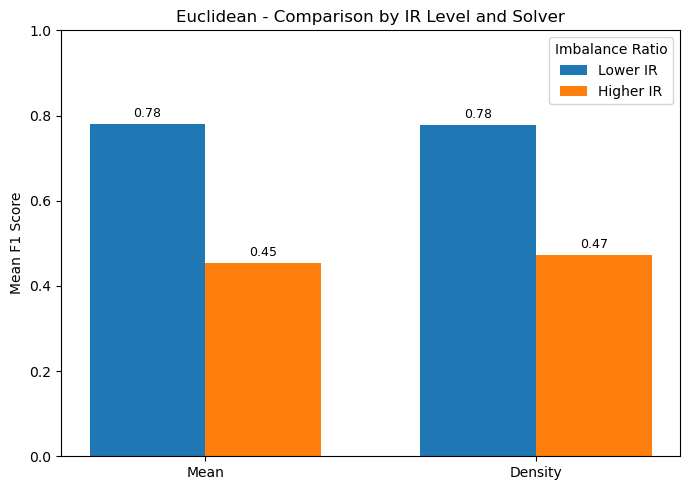

In [38]:
bar_labels = ['Mean', 'Density']
lower_means = [euclidean_means[0], euclidean_means[1]]
higher_means = [euclidean_means[2], euclidean_means[3]]

x = range(len(bar_labels))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(7,5))
bars1 = ax.bar([i - bar_width/2 for i in x], lower_means, width=bar_width, label='Lower IR', color='#1f77b4')
bars2 = ax.bar([i + bar_width/2 for i in x], higher_means, width=bar_width, label='Higher IR', color='#ff7f0e')

ax.set_ylabel('Mean F1 Score')
ax.set_title('Euclidean - Comparison by IR Level and Solver')
ax.set_xticks(x)
ax.set_xticklabels(bar_labels)
ax.set_ylim(0, 1)
ax.legend(title='Imbalance Ratio')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
